#Diagnose von Herzerkrankungen mit Machine Learning
**Autor:**<br> Vimal Kandrical

**Daten:**<br>[Heart Disease Cleveland UCI | Kaggle](https://www.kaggle.com/cherngs/heart-disease-cleveland-uci) 

# Einleitung

Im Rahmen des Moduls Machine Learning im CAS Machine Intelligence werden in diesem Projekt verschiedene Machine Learning Methoden genutzt, um Herzerkrankungen zu diagnostizieren.


# Datensatz

## Ursprung
Dieser Datensatz stammt von der Cleveland Klinik aus Ohio. Es handelt sich um klinische und nicht-invasive Resultate, welche aus Angiographien bei 303 Patienten resultierten.

## Beschreibung
Der Datensatz beinhaltete ursprünglich 75 Attribute, welche aber auf 13 Attribute und eine Zielvariable reduziert wurde.

**Attribute:**
*   age:<br>
age in years
*   sex:<br>
sex (1 = male, 0 = female)
*   cp:<br>
chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
*   trestbps:<br>
resting blood pressure (in mm Hg on admission to the hospital)
*   chol:<br>
serum cholestoral in mg/dl 
*   fbs:<br>
fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
*   restecg:<br>
resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
*   thalach:<br>
maximum heart rate achieved
*   exang:<br>
exercise induced angina (1 = yes, 0 = no)
*   oldpeak:<br>
ST depression induced by exercise relative to rest
*   slope:<br>
the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
*   ca :<br>
number of major vessels (0-3) colored by flourosopy
*   thal:<br>
thallium stress test result (0 = normal, 1 = fixed defect, 2 = reversabel defect)

**Zielvariable:**
*   condition:<br>
0 = no disease, 1 = disease

Zum besseren medizinischen Verständnis der Attribute restecg, oldpeak, slope und thal werden hier noch zwei Themen kurz erläutert.

**EKG Basics:**

![Bildlink kaputt](https://www.ratgeber-herzinsuffizienz.de/sites/ratgeber_herzinsuffizienz_de/files/styles/crop_freeform/public/2019-12/ekg-kurve.webp?itok=2qVKNimN)
*   P-Welle: Erregung der Vorhöfe, die sich zusammenziehen und Blut in die schlaffen Kammern pressen
*   PQ-Strecke: Überleitung des Impulses auf die Herzkammern
*   QRS-Komplex: Höchster Punkt der Zacke zeigt an, dass die gesamten Herzmuskelzellen mit elektrischer Energie versorgt sind – die Herzkammern ziehen sich zusammen
*   ST-Strecke: Zeit, die vergeht, bis das Blut aus den Kammern gepumpt ist, und die Erholung des Herzmuskels beginnt
*   T-Welle: Nachdem das Blut vollständig aus dem Herzen ausgeworfen ist, erfolgt die Entspannungsphase und Erschlaffung der Herzkammern

[Quelle: ratgeber-herzinsuffizienz.de](https://www.ratgeber-herzinsuffizienz.de/erkennen/herzinsuffizienz-diagnose/ekg)

**Thallium stress test:**

[...]

Imaging the heart helps determine whether inducing stress using the above methods (*Laufbahn/Ergometer*) caused detectable myocardial ischemia, which would **then indicate a significant coronary stenosis**. The means to image the heart include electrocardiography (ECG stress testing), echocardiography, nuclear imaging and magnetic resonance imaging (MRI). 

[...]

Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte) (*hier: Thallium*), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. **A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress**. This is called a **"reversible defect"**. **Scarred myocardium from prior infarct will not take up tracer at all** and is referred to as a **"fixed defect"**. 

[...]

[Quelle: healio.com](https://www.healio.com/cardiology/learn-the-heart/cardiology-review/topic-reviews/stress-testing-review)















# Voranalyse

Daten einlesen und sich einen ersten Überblick verschaffen.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64

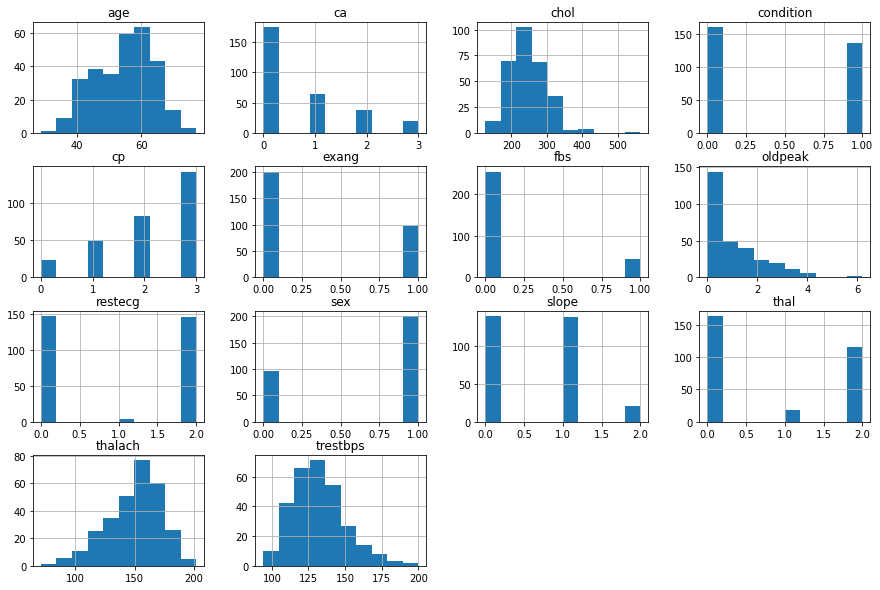

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 20

datensatz = pd.read_csv("heart_cleveland_upload.csv", ",")

print(datensatz.head())
print(datensatz.info())
print(datensatz.describe())
datensatz.hist(figsize=(15, 10))
korrelation = datensatz.corr()
korrelation["condition"].sort_values(ascending=False)  
     

**Erste Erkenntnisse:**


*   kategorielle Variablen: condition, cp, exang, fbs, restecg, sex, slope, thal  
*   keine NULL Werte
*   nur Patienten über 29
*   mehrheitlich Männer (68%)
*   kein Attribut korreliert stark mit der Zielvariable. Viele haben zeigen eine mittelmässig Korrelation und einige korrelieren nur wenig (chol, fbs)
*   Folgende Attribute sind rechtsschief: chol, oldpeak und trestbps -> eventuell Log-Transformation anwenden
*   die Zielvariable (condition) ist ca. 50/50 verteilt
*   wenige Patienten haben eine ST-T Kurvenabnormalität (restecg=1) oder vernarbtes Herzmuskelgewebe von einem Herzinfarkt (thal=1)
*   nur die Attribute chol und oldpeak haben potentielle Ausreisser




# Pipelines

Datensatz splitten in Training- und Testsample (80/20). Dabei wir auf eine Stratifizierung verzichtet (stratified shuffling), da kein Attribut eine sehr hohe Korrelation zur Zielvariable aufweist.

In [4]:
from sklearn.model_selection import train_test_split

X = datensatz.drop("condition", axis=1)
y = datensatz["condition"].copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=88)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(237, 13) (60, 13) (237,) (60,)


Pipelines für die numerischen und kategoriellen Attribute:


*   numerisch: Log-Transformation für leicht rechtsschiefe Attribute und Standardisierung aller Attribute auf Mittelwert 0 und Standardabweichung 1
*   kategoriell: one-hot encoding



In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
import numpy as np

rschief_att = ["chol", "oldpeak", "trestbps"]
num_att = ["age", "ca", "thalach"]
kat_att = ["cp", "exang", "fbs", "restecg", "sex", "slope", "thal"]

rschief_pipe = Pipeline([('log', FunctionTransformer(np.log1p, validate=False)),
                         ('ss', StandardScaler())]) 
num_pipe = Pipeline([('ss', StandardScaler())])
kat_pipe = Pipeline([('ohe', OneHotEncoder())])

pipelines = ColumnTransformer([
  ("rschief", rschief_pipe, rschief_att),
  ("num", num_pipe, num_att),
  ("kat", kat_pipe, kat_att),
])

datensatz_aufb = pipelines.fit_transform(x_train)

head = "chol,oldpeak,trestbps,age,ca,thalach,cp0,cp1,cp2,cp3,exang0,exang1,\
fbs0,fbs1,restecg0,restecg1,restecg2,sex0,sex1,slope0,slope1,slope2,\
thal0,thal1,thal2"
np.savetxt("datensatz_aufb.csv", datensatz_aufb, header=head, delimiter=",")

# Training der Modelle

##Stochastic Gradient Descent (SGD)

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve

def plot_prec_recall(prec, recall, threshold):
  plt.plot(threshold, prec[:-1], "b--", label="Precision")
  plt.plot(threshold, prec[:-1], "b--", label="Precision")

sgd = SGDClassifier(random_state=88)
sgd_pred = cross_val_predict(sgd, datensatz_aufb, y_train, cv=5,\
                             method="decision_function")
confusion_matrix(y_train, sgd_pred)



array([[104,  24],
       [ 23,  86]])

# Resultate

# Konklusion